In [19]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.axes as axes
import time, datetime
pd.set_option('display.max_rows', 20)
!date

Mon Feb 10 22:03:30 PST 2020


# Aggregate and plot outputs of Minimal minority-majority sim

launch code at /ihme/code/beatrixh/microsim_2020/census_2020/launch_majority_minority_jobs.py \
sim code at /ihme/code/beatrixh/microsim_2020/census_2020/launch_majority_minority_jobs.py

In [250]:
os.listdir('/ihme/code/beatrixh/microsim_2020/census_2020/')

['launch_majority_minority_jobs.py',
 '2020_01_23a_dp_majority_minority_bias_sim.py']

In [249]:
def summarize_dir(path):
    """
    Parameter: input dir containing csvs
    ---------
    Output: 1-column df containing the row means of the concatenated csvs
    """
    files = os.listdir(path)
    output = pd.DataFrame(np.zeros([11,1]))
    for file in files:
        df = pd.read_csv(path + '/' + file, index_col=False)
        df = df.iloc[:,1:]
        output = pd.concat([output,df], axis=1, ignore_index=True)
    return output.mean(axis=1)

In [277]:
# get dt with one col per sim setting
dirs = os.listdir('/ihme/scratch/users/beatrixh/2020-02-10')
dirs = ['/ihme/scratch/users/beatrixh/2020-02-10/' + i for i in dirs]

dt = pd.DataFrame()
for path in dirs:
    new = summarize_dir(path)
    dt = pd.concat([dt, new], axis = 1, ignore_index=True)
print(dt.T)

          0          1             2         3       4       5     6   \
0  10408.890  10404.483   8856.299273  0.151086  9990.0  0.1998  9.99   
1  13486.962  13499.715  11470.987679  0.150761  9990.0  0.1998  9.99   
2  15536.378  15541.071  13165.457505  0.153846  9990.0  0.1998  9.99   
3   1616.882   1618.263   1403.755178  0.141440  9990.0  0.1998  9.99   
4   6479.257   6480.303   5547.067216  0.146417  9990.0  0.1998  9.99   
5      0.000      0.000      0.000000  0.000000  9990.0  0.1998  9.99   

              7        8        9      10  
0  586732.575116  0.04995  0.59940  450.0  
1  586732.575116  0.04995  0.79920  450.0  
2  586732.575116  0.04995  0.99900  450.0  
3  586732.575116  0.04995  0.19980  450.0  
4  586732.575116  0.04995  0.39960  450.0  
5  586732.575116  0.04995  0.00999  450.0  


In [311]:
names = ['precise','dp','non-neg','pct_change',
        'number of most detailed areas','alpha','beta','total pop count',
        'prop minority','segregation factor','seed']
names_dict = {i : names[i] for i in range(0,len(names))}
data = dt.T.rename(columns=names_dict)
data

0.1998

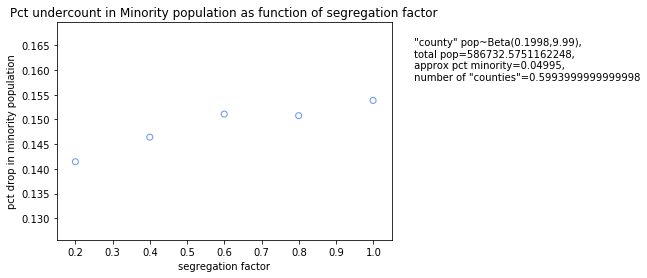

In [333]:
# plot as fn of segregation factor

x = data[:5]['segregation factor']
y = data[:5]['pct_change']
params = ' "county" pop~Beta({},{}),\n \
total pop={},\n \
approx pct minority={},\n \
number of "counties"={}'.format(data['alpha'][0],
                                data['beta'][0],
                                data['total pop count'][0],
                                data['prop minority'][0],
                                data['segregation factor'][0],
                                data['number of most detailed areas'][0])

fig = plt.figure() 

ax = fig.add_subplot(111)
ax.scatter(x, y, facecolors='none', edgecolors = 'cornflowerblue')

plt.xlabel('segregation factor')
plt.ylabel('pct drop in minority population')
# plt.title('Drop in Minority population as function of segregation factor')
plt.title('Pct undercount in Minority population as function of segregation factor')
plt.text(1.1,0.158,params)

plt.show()

In [338]:
# you're going to want to plot pct_change as a function of prop minority, seg factor, and (a,b). 

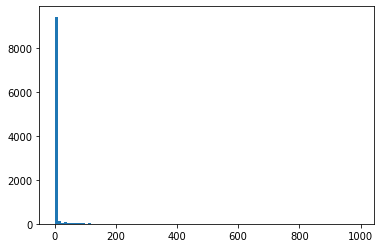

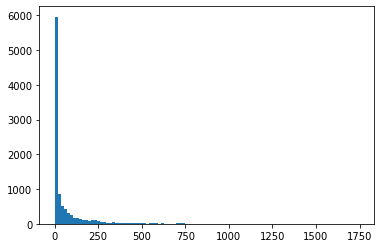

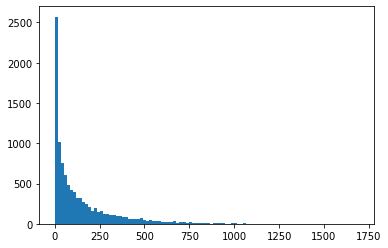

In [337]:
for [a,b] in [[.02,10],[.2,10],[.5,10]]:
    n_k = 3e3* np.random.beta(a, b, 10_000)
    plt.hist(n_k, bins = 100)
    plt.show()